In [21]:
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import numpy as np
import json
import csv

# Visualise Monopolotron winrate

In [22]:
def load_game_hist(path: str) -> np.array:
    with open(path) as f:
        hist = csv.reader(f, delimiter=',')
        return np.array(next(hist)).astype(int)

def load_reward_hist(path: str) -> np.array:
    out = []
    with open(path) as f:
        losses = csv.reader(f, delimiter=',')
        for line in losses:
            if line:
                out += line
        return np.array(out).astype(float)

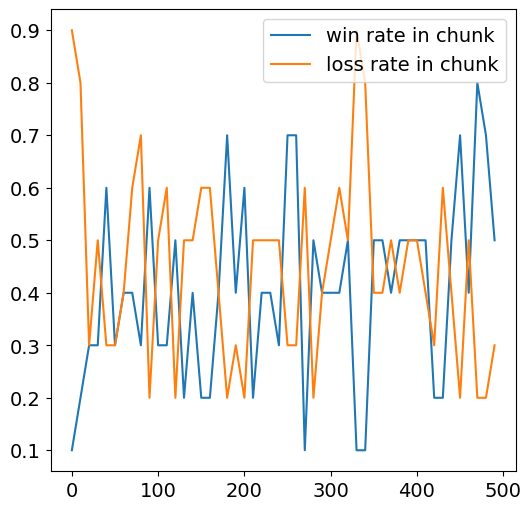

In [25]:
hist = load_game_hist('stats/train_hist.csv')

chunk_samples = 10
chunks = len(hist) // chunk_samples
epochs = np.arange(chunks) * chunk_samples

wins_chunk = np.zeros(chunks)
losses_chunk = np.zeros(chunks)

for c in range(chunks):
    wins_chunk[c] = np.mean(np.maximum(hist[c*chunk_samples : (c + 1)*chunk_samples], 0))
    losses_chunk[c] = -np.mean(np.minimum(hist[c*chunk_samples : (c + 1)*chunk_samples], 0))

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(epochs, wins_chunk, label='win rate in chunk')
ax.plot(epochs, losses_chunk, label='loss rate in chunk')
ax.legend()

plt.savefig("stats/winningRateCurve.png")
plt.show()

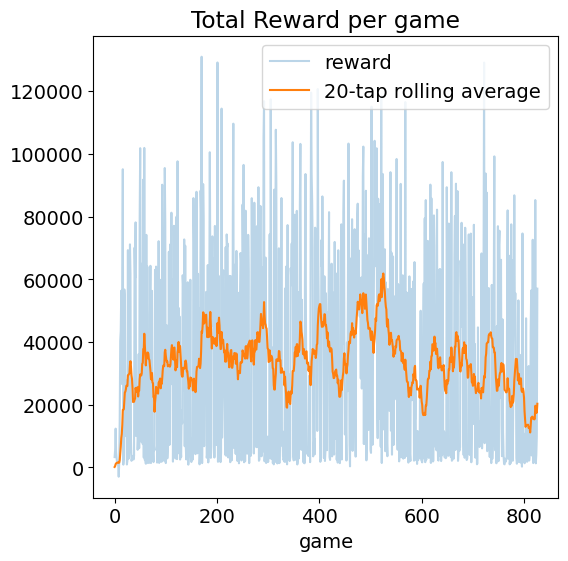

In [30]:
rew_hist = load_reward_hist('stats/reward.csv')
rew_hist_av = np.zeros_like(rew_hist)
averages = 20

for i, _ in enumerate(rew_hist):
        rew_hist_av[i] = np.mean([int(i-j >= 0) * rew_hist[i - j] for j in range(averages)])

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(rew_hist, label='reward', alpha=.3)
ax.plot(rew_hist_av, label=f'{averages}-tap rolling average')
ax.legend()
ax.set_title("Total Reward per game")
ax.set_xlabel("game")

plt.savefig("stats/learningCurve.png")
plt.show()

In [ ]:

rew_hist = load_reward_hist('stats/reward.csv')

In [ ]:
rew_hist